In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from gen_wordcloud import *

In [2]:
#read data
python = pd.read_excel('../data/Github_python.xlsx')
java = pd.read_excel('../data/Github_java.xlsx')
C = pd.read_excel('../data/Github_C.xlsx')
java_s = pd.read_excel('../data/Github_javascript.xlsx')
Cpp = pd.read_excel('../data/Github_Cpp.xlsx')
C_sharp = pd.read_excel('../data/Github_Csharp.xlsx')

In [3]:
#add a language column
python['Language'] = 'Python'
java['Language'] = 'Java'
C['Language'] = 'C'
java_s['Language'] = 'JavaScript'
Cpp['Language'] = 'C++'
C_sharp['Language'] = 'C#'

In [4]:
#concat to one DataFrame and save a new file
data = pd.concat([python, java, C, java_s, Cpp, C_sharp], axis = 0, ignore_index = True)
data = data.sort_values('Stars')
data.to_excel('../data/Github_all.xlsx')
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.set_index('Full Name')
data.shape

(6120, 11)

In [5]:
#print some basic statistic information 
data['Stars'].describe()

count      6120.000000
mean       4925.611765
std        8055.872840
min         535.000000
25%        1464.000000
50%        2960.000000
75%        5120.000000
max      307351.000000
Name: Stars, dtype: float64

In [6]:
#select rows with stats >= mean value
data = data[data['Stars'] >= data['Stars'].mean()]
data = data.sort_values(by = 'Stars', ascending = False)
data.shape

(1659, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, freeCodeCamp/freeCodeCamp to tkarras/progressive_growing_of_gans
Data columns (total 11 columns):
Description        1656 non-null object
Stars              1659 non-null int64
Forks              1659 non-null int64
Created Time       1659 non-null object
Size               1659 non-null int64
Owner Type         1659 non-null object
Owner Location     1020 non-null object
Owner Followers    1659 non-null int64
Repo_num           1659 non-null int64
Company            393 non-null object
Language           1659 non-null object
dtypes: int64(5), object(6)
memory usage: 155.5+ KB


In [42]:
data.groupby('Language').describe()

Stars                                                       \
            count          mean           std     min      25%     50%   
Language                                                                 
C           108.0  10668.277778   9748.698758  4973.0  5736.50  7824.5   
C#           46.0   9332.869565   6582.584888  4932.0  6110.25  6947.5   
C++         156.0  12654.544872  14394.974850  4945.0  6509.50  8589.0   
Java        338.0  10619.115385   8902.480984  4942.0  5932.50  7740.0   
JavaScript  660.0  13293.292424  15974.993589  4932.0  6697.75  9148.0   
Python      351.0  11131.700855  10172.262809  4927.0  5854.50  7675.0   

                                Forks               ... Owner Followers  \
                 75%       max  count         mean  ...             75%   
Language                                            ...                   
C           11407.00   83813.0  108.0  2564.018519  ...          696.50   
C#          11187.75   45535.0   46.0  2402.978261  ...            0.00   
C++         13257.00  138748.0  156.0  3056.628205  ...            0.00   
Java        11262.75   85486.0  338.0  3018.284024  ...         1272.50   
JavaScript  13659.00  307351.0  660.0  2052.904545  ...          646.25   
Python      11156.50   77819.0  351.0  2431.153846  ...          653.50   

                     Repo_num                                           \
                 max    count        mean         std  min   25%   50%   
Language                                                                 
C           103573.0    108.0   85.314815  317.275571  1.0   9.0  22.5   
C#            2029.0     46.0  205.934783  591.943443  2.0  14.0  27.0   
C++           7887.0    156.0  315.551282  747.485119  1.0  10.0  31.5   
Java         55614.0    338.0  188.887574  451.732017  1.0  15.0  37.0   
JavaScript   57461.0    660.0  108.989394  276.587505  1.0  14.0  41.5   
Python       27466.0    351.0   86.826211  285.940815  1.0  11.0  27.0   

                            
               75%     max  
Language                    
C            64.75  2893.0  
C#          169.00  2894.0  
C++          93.00  2893.0  
Java         96.75  2217.0  
JavaScript   95.00  2893.0  
Python       70.00  2892.0  

[6 rows x 40 columns]

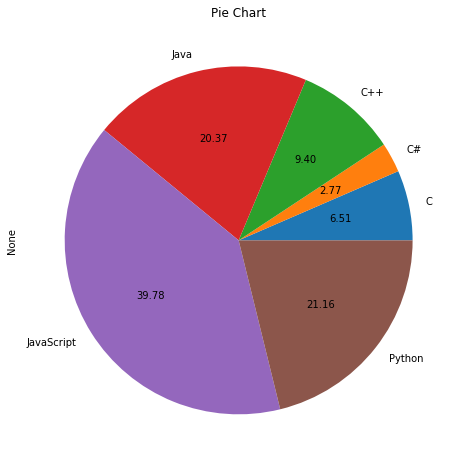

In [69]:
#draw pie chart
x  = data.groupby('Language').apply(len)
plt.figure(figsize = (8, 8))
x.plot(kind = 'pie', subplots = True, autopct = '%.2f')
plt.title('Pie Chart')
plt.savefig('../picture/pie.png')
plt.show()

(0, 0.0002)

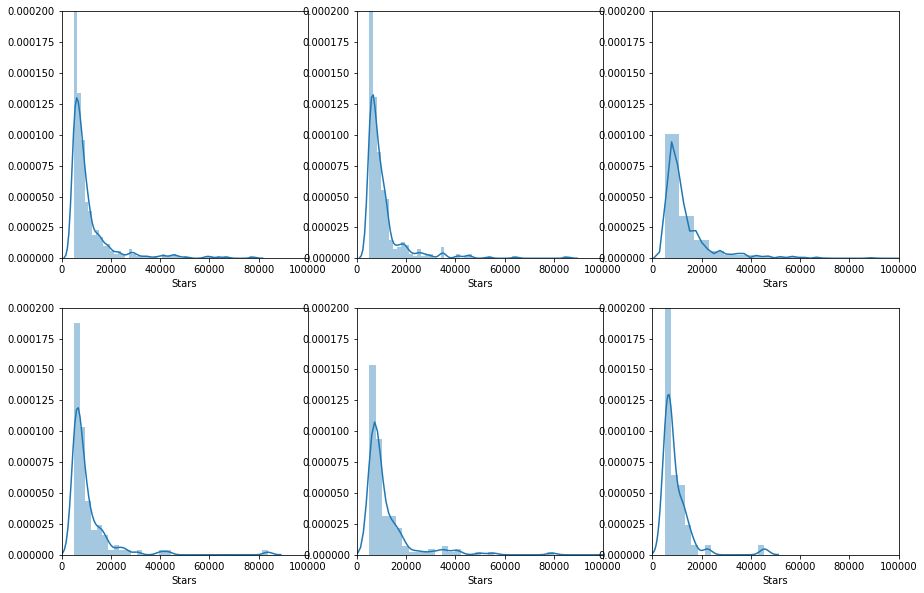

In [68]:
plt.figure(figsize = (15, 10))

plt.subplot(231)
sns.distplot(data[data['Language'] == 'Python']['Stars'])
plt.xlim(0, 100000)
plt.ylim(0, 0.0002)
plt.subplot(232)
sns.distplot(data[data['Language'] == 'Java']['Stars'])
plt.xlim(0, 100000)
plt.ylim(0, 0.0002)
plt.subplot(233)
sns.distplot(data[data['Language'] == 'JavaScript']['Stars'])
plt.xlim(0, 100000)
plt.ylim(0, 0.0002)
plt.subplot(234)
sns.distplot(data[data['Language'] == 'C']['Stars'])
plt.xlim(0, 100000)
plt.ylim(0, 0.0002)
plt.subplot(235)
sns.distplot(data[data['Language'] == 'C++']['Stars'])
plt.xlim(0, 100000)
plt.ylim(0, 0.0002)
plt.subplot(236)
sns.distplot(data[data['Language'] == 'C#']['Stars'])
plt.xlim(0, 100000)
plt.ylim(0, 0.0002)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f32c4aaa518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32c49c4c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32c49c4400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32c4a01978>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f32c4a01940>],
 'means': []}

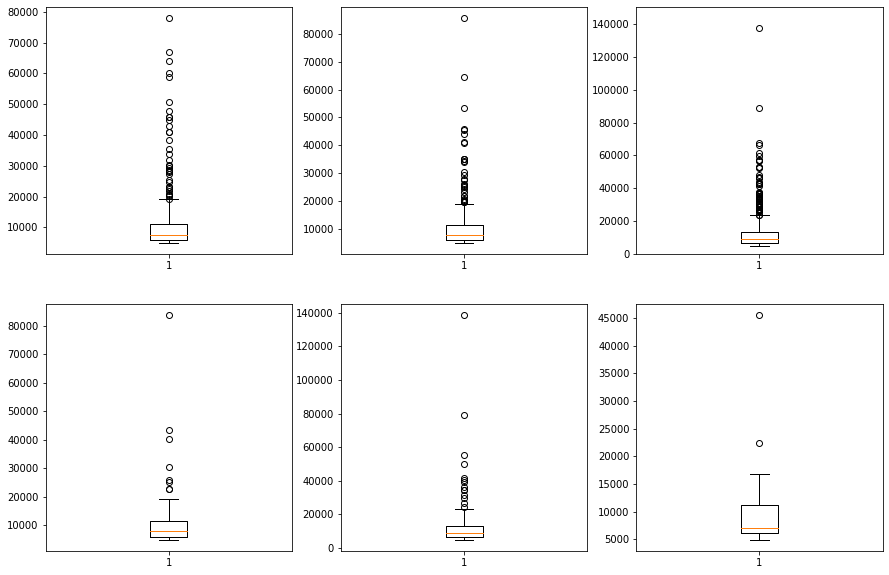

In [83]:
plt.figure(figsize = (15, 10))
plt.subplot(231)
plt.boxplot(data[data['Language'] == 'Python']['Stars'])
plt.subplot(232)
plt.boxplot(data[data['Language'] == 'Java']['Stars'])
plt.subplot(233)
plt.boxplot(data[data['Language'] == 'JavaScript']['Stars'])
plt.ylim(0, 150000)
plt.subplot(234)
plt.boxplot(data[data['Language'] == 'C']['Stars'])
plt.subplot(235)
plt.boxplot(data[data['Language'] == 'C++']['Stars'])
plt.subplot(236)
plt.boxplot(data[data['Language'] == 'C#']['Stars'])

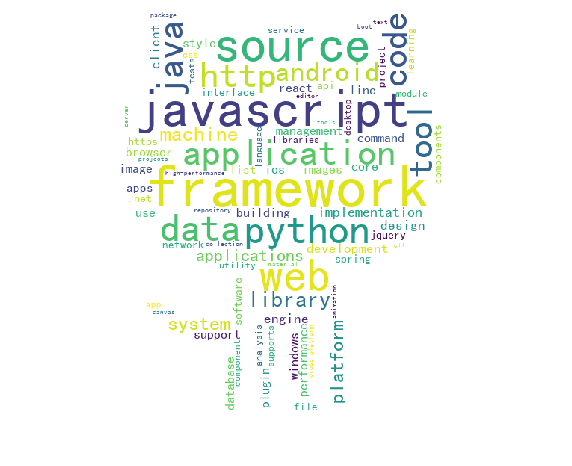

In [9]:
#generate wordcloud
plt.figure(figsize = (10,10))
wordcloud = gen_wordcloud(data.reset_index())
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('../picture/wordcloud_all.jpg')


In [10]:
data.head()

,Description,Stars,Forks,Created Time,Size,Owner Type,Owner Location,Owner Followers,Repo_num,Company,Language
Full Name,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,The https://www.freeCodeCamp.org open source c...,307351,23326,2014-12-24,121852,Organization,Just here on Earth... for now,0,126,NaN,JavaScript
tensorflow/tensorflow,An Open Source Machine Learning Framework for ...,138748,78980,2015-11-07,456557,Organization,NaN,0,86,NaN,C++
twbs/bootstrap,"The most popular HTML, CSS, and JavaScript fra...",137529,67652,2011-07-29,150022,Organization,San Francisco,0,22,NaN,JavaScript
d3/d3,"Bring data to life with SVG, Canvas and HTML. ...",88992,21628,2010-09-27,41490,Organization,"San Francisco, CA",0,52,NaN,JavaScript
CyC2018/CS-Notes,:books: 技术面试必备基础知识、Leetcode、计算机操作系统、计算机网络、系统设计...,85486,27435,2018-02-13,111417,User,"Guangzhou, China",8919,17,@ByteDance,Java


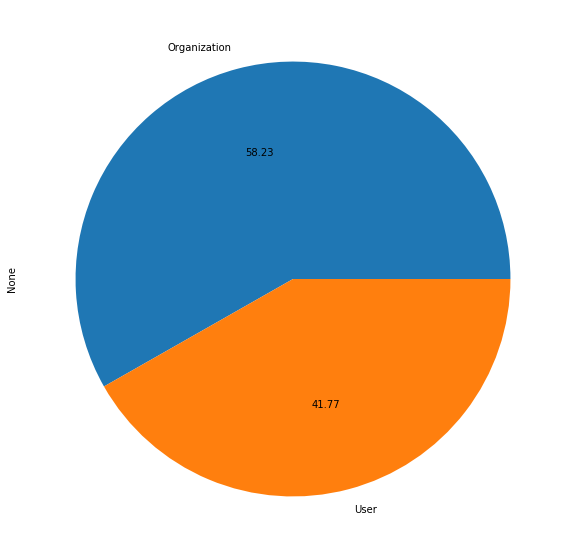

In [11]:
usr = data.groupby('Owner Type').apply(len)
plt.figure(figsize = (10, 10))
usr.plot(kind = 'pie', autopct = '%.2f')

In [12]:
data.groupby('Owner Type').agg(['mean', 'std' ,'max', 'min', 'median'])

Stars                                           Forks  \
                      mean           std     max   min median         mean   
Owner Type                                                                   
Organization  12798.579710  15118.820158  307351  4937   8918  2736.953416   
User          10768.005772   8971.009534   85486  4927   8170  2090.649351   

                                              ... Owner Followers  \
                      std    max  min median  ...            mean   
Owner Type                                    ...                   
Organization  4828.286866  78980  134   1476  ...        0.000000   
User          2780.875141  29346  136   1365  ...     3229.137085   

                                                Repo_num                    \
                      std     max min median        mean         std   max   
Owner Type                                                                   
Organization     0.000000       0   0      0  195.593168  513.835071  2894   
User          8468.133413  103573  33    877   65.256854  101.043517   944   

                         
             min median  
Owner Type               
Organization   1     29  
User           1     36  

[2 rows x 25 columns]

(0, 60000)

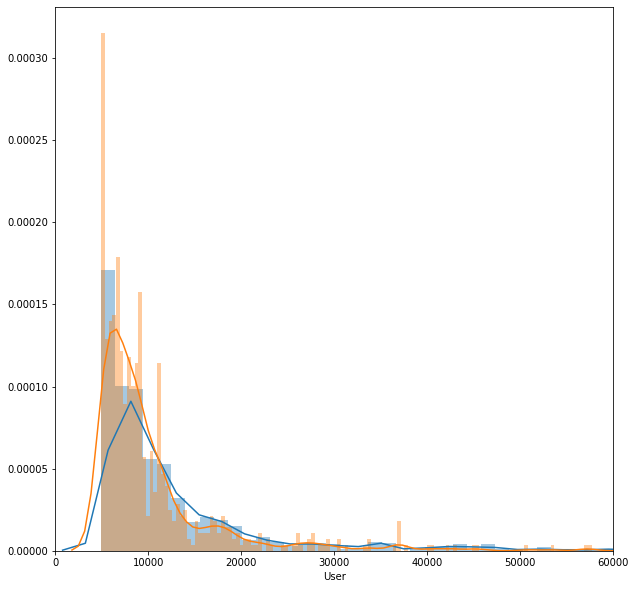

In [34]:
import seaborn as sns
plt.figure(figsize = (10, 10))
data.groupby('Owner Type')['Stars'].apply(sns.distplot, bins = 200)
plt.xlim(0, 60000)

In [22]:
#获得有位置信息的行和有公司信息的行
data_loc = data.dropna(subset = ['Owner Location'])
data_loc.to_excel('../data/Github_loc.xlsx')
data_comp = data.dropna(subset = ['Company'])
data_comp.to_excel('../data/Github_comp.xlsx')
data.shape, data_loc.shape, data_comp.shape
#由此可见，大部分资料是有缺失的

((1659, 11), (1020, 11), (393, 11))

(299,)

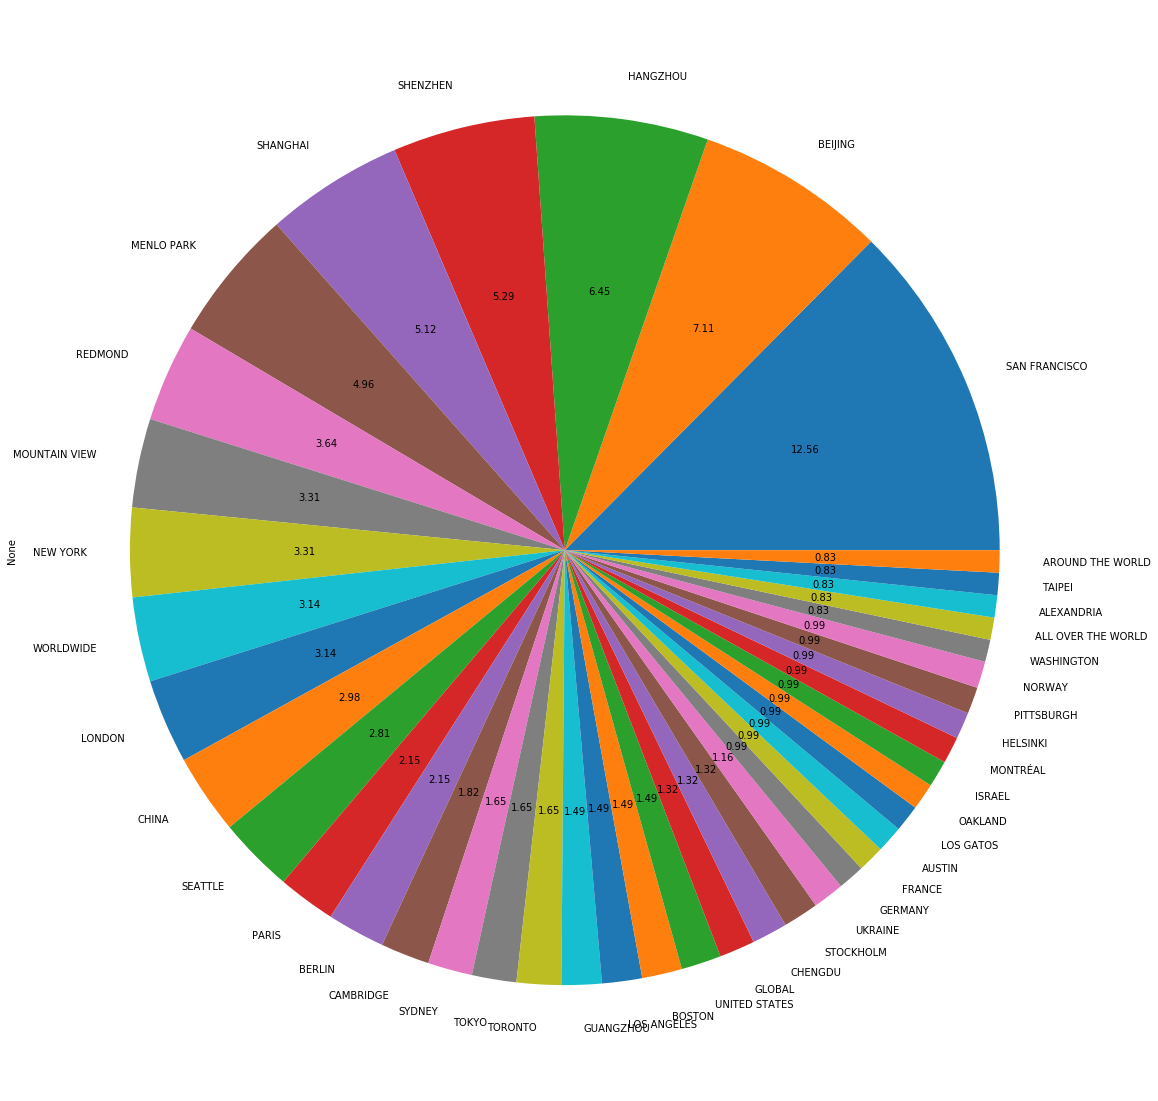

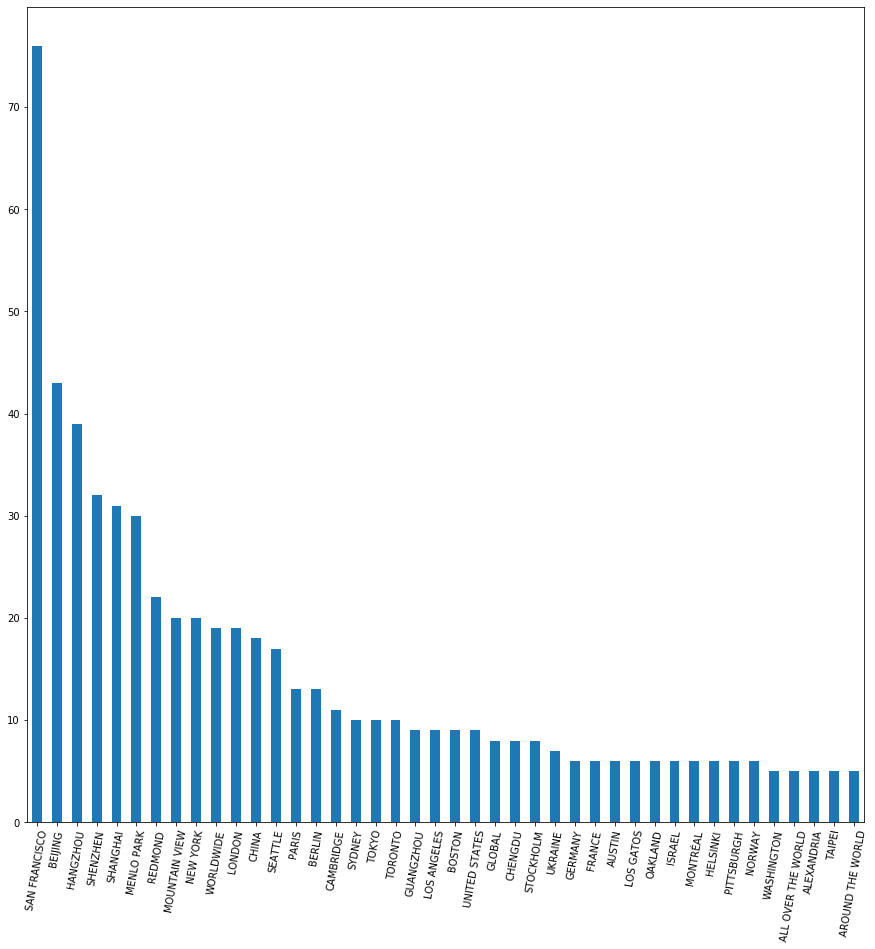

In [45]:
#print location information
loc = data_loc.groupby('Owner Location').apply(len)
#print(loc.shape)
#因为获得的位置信息格式过于凌乱，暂时没有找到很好的方法进行完整统一，只尝试进行了初步的统一
loc.index = [x.upper().split(',')[0] for x in loc.index]
#loc['OTHERS'] = 0
loc = loc.groupby(loc.index).sum()
loc = loc.sort_values(ascending = False)
plt.figure(figsize = (20,20))
loc[loc.values >=5].plot(kind = 'pie', autopct = '%.2f')
plt.savefig('../picture/loc_pie.png')
plt.figure(figsize = (15,15))
loc[loc.values >= 5].plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.savefig('../picture/loc_bar.png')
loc.shape

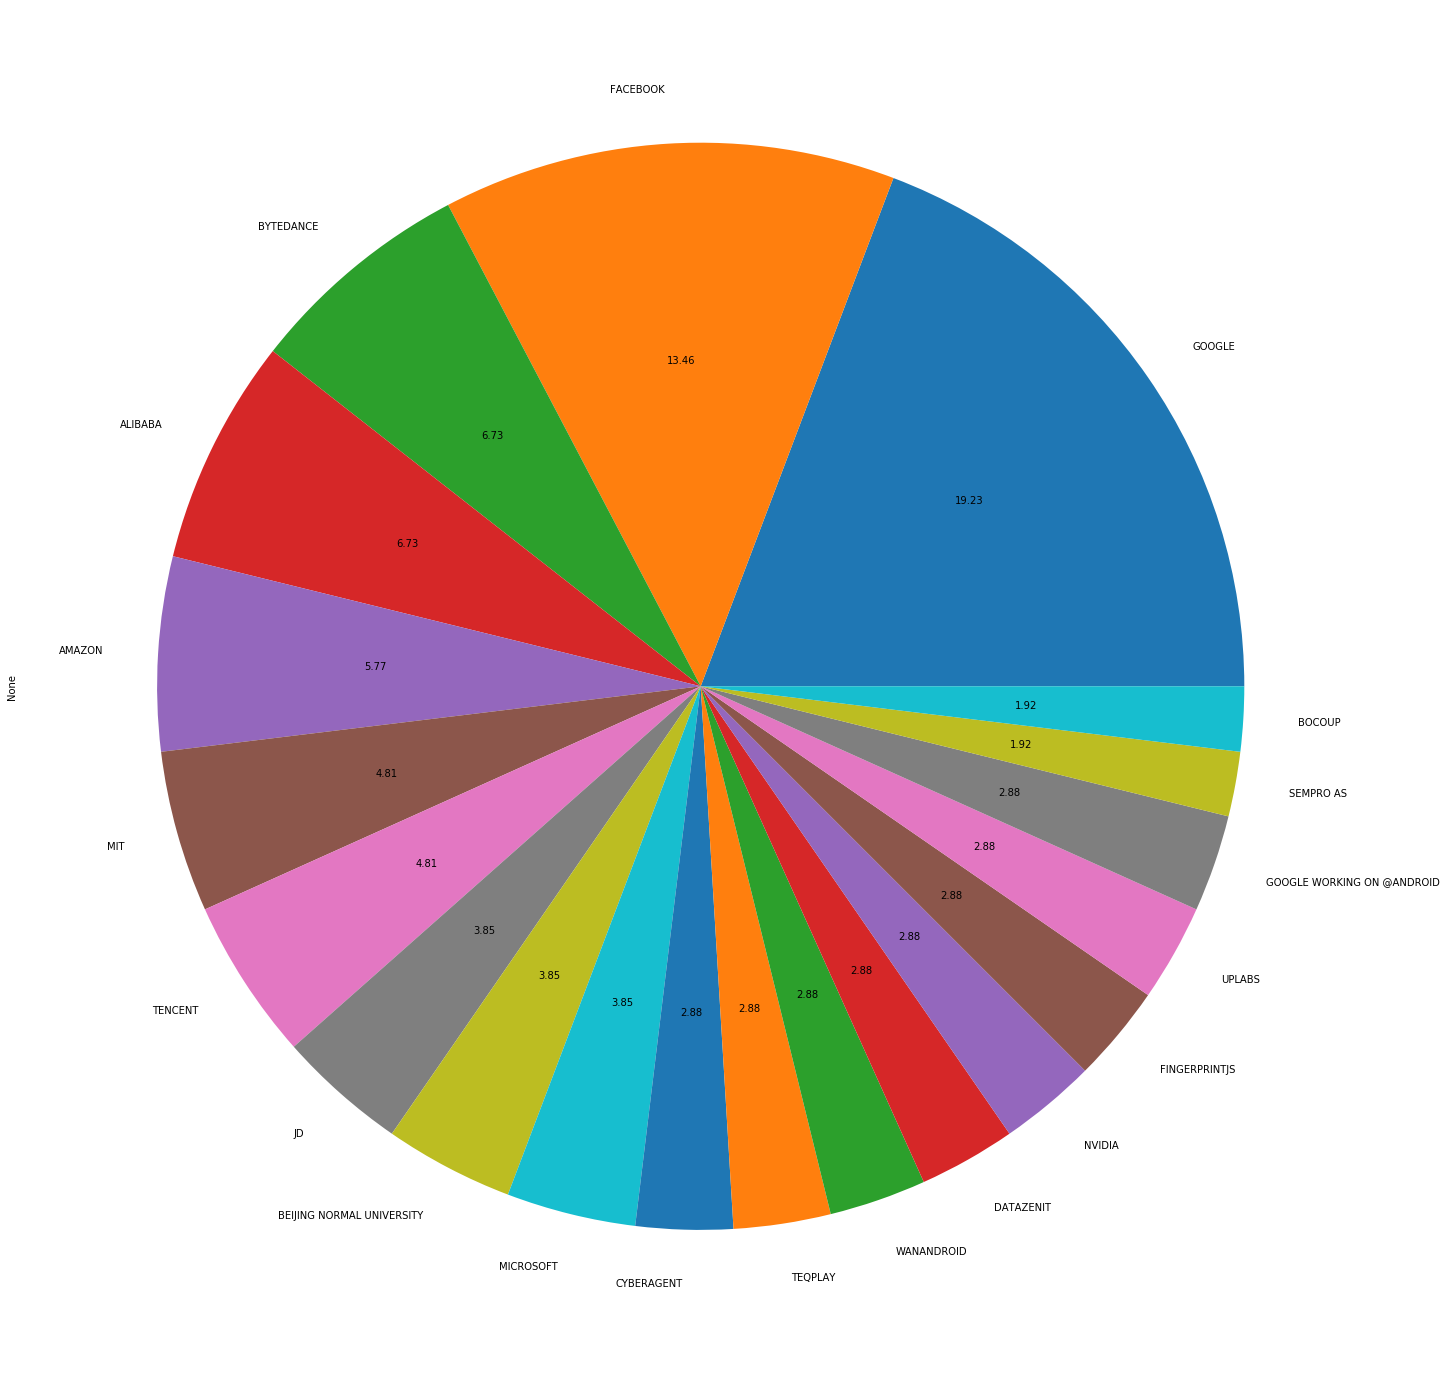

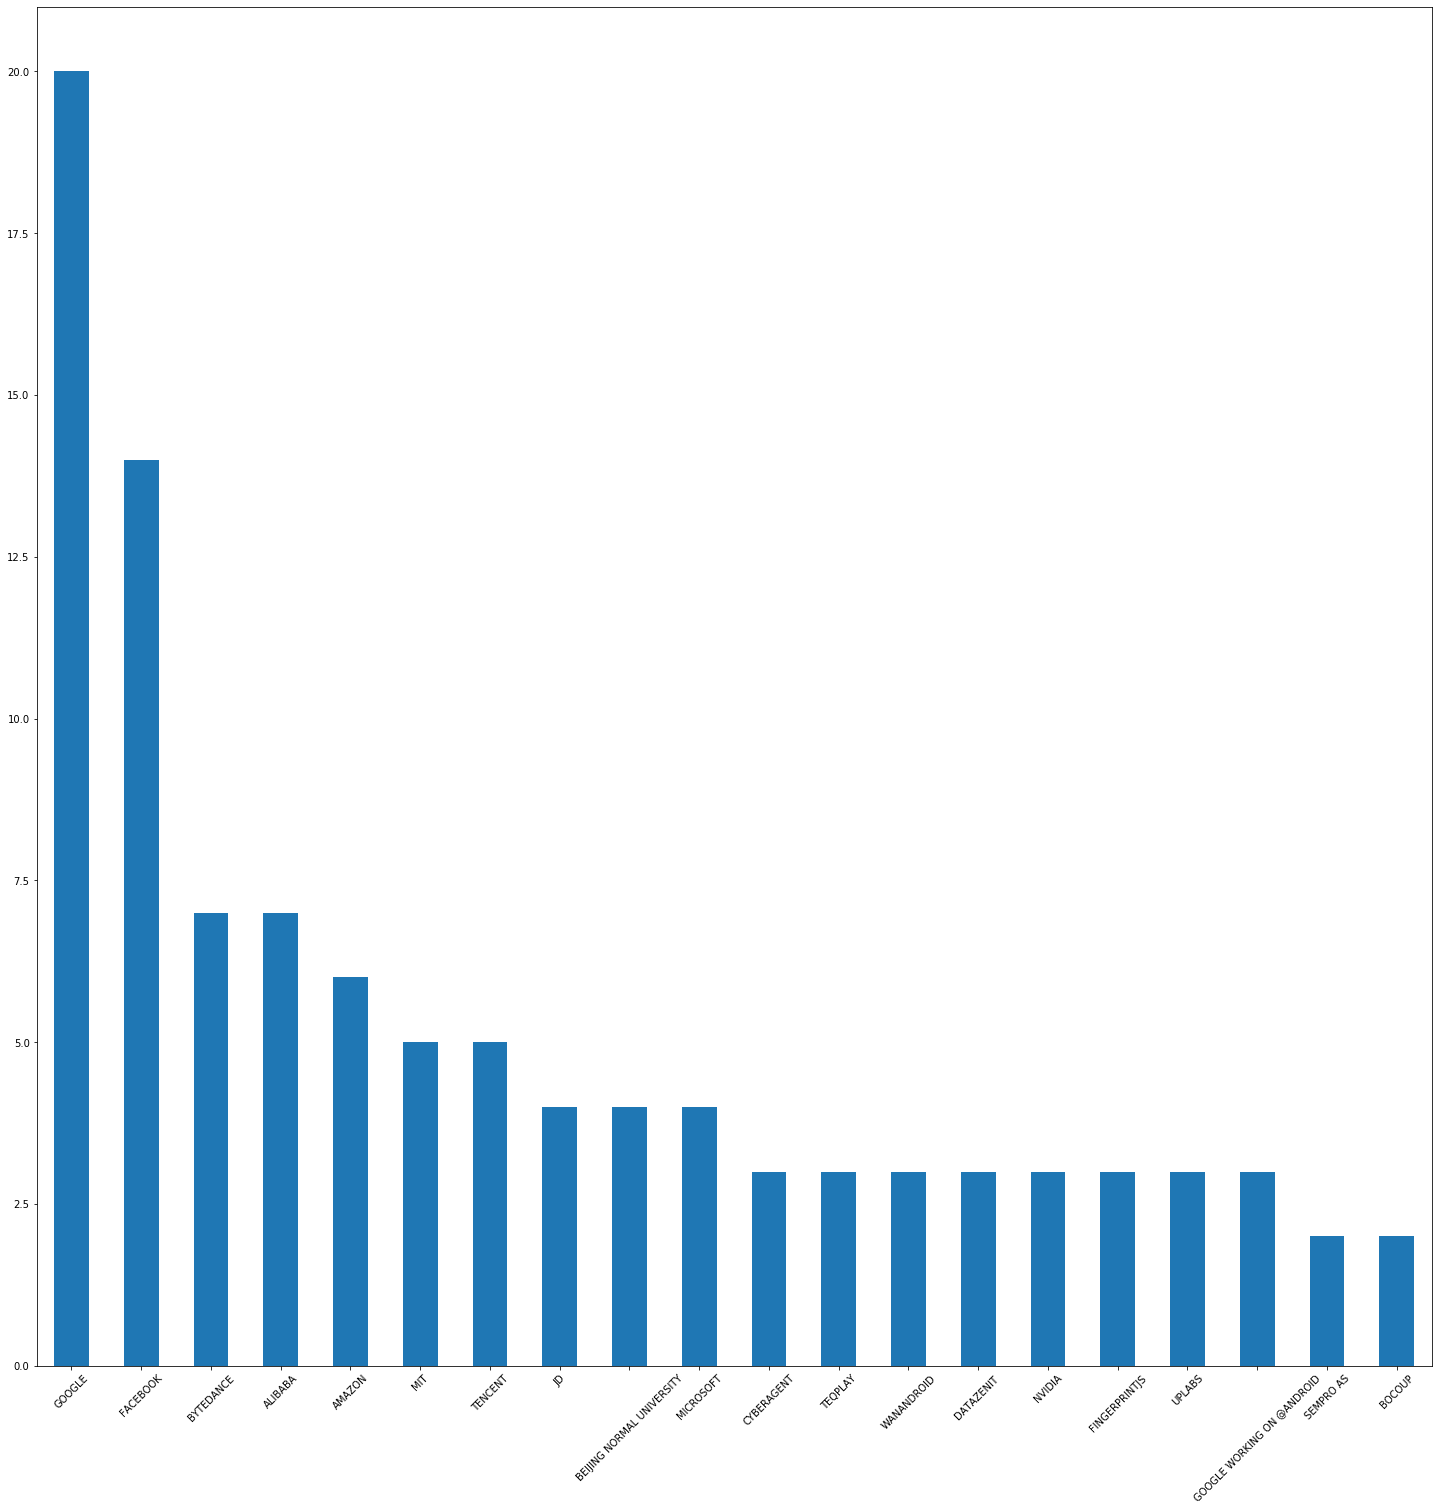

In [49]:
company = data_comp.groupby('Company').apply(len)
company.index = [x.split(',')[0].split('.')[0].strip('@').upper() for x in company.index]
company = company.groupby(company.index).sum()
company = company.sort_values(ascending = False)
plt.figure(figsize = (25, 25))
company.head(20).plot(kind = 'pie', autopct = '%.2f')
plt.savefig('../picture/company_pie.png')
plt.figure(figsize = (25, 25))
company.head(20).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.savefig('../picture/company_bar.png')

In [52]:
data.describe()

,Stars,Forks,Size,Owner Followers,Repo_num
count,1659.00000,1659.00000,1.659000e+03,1659.000000,1659.000000
mean,11950.36528,2466.97830,7.448828e+04,1348.880048,141.148885
std,12947.27514,4110.68187,2.565881e+05,5697.990691,402.574293
min,4927.00000,134.00000,3.300000e+01,0.000000,1.000000
25%,6332.50000,795.00000,2.567000e+03,0.000000,13.000000
50%,8502.00000,1434.00000,1.137900e+04,0.000000,34.000000
75%,12244.50000,2608.50000,4.814850e+04,645.000000,85.500000
max,307351.00000,78980.00000,5.635024e+06,103573.000000,2894.000000


(0, 40000)

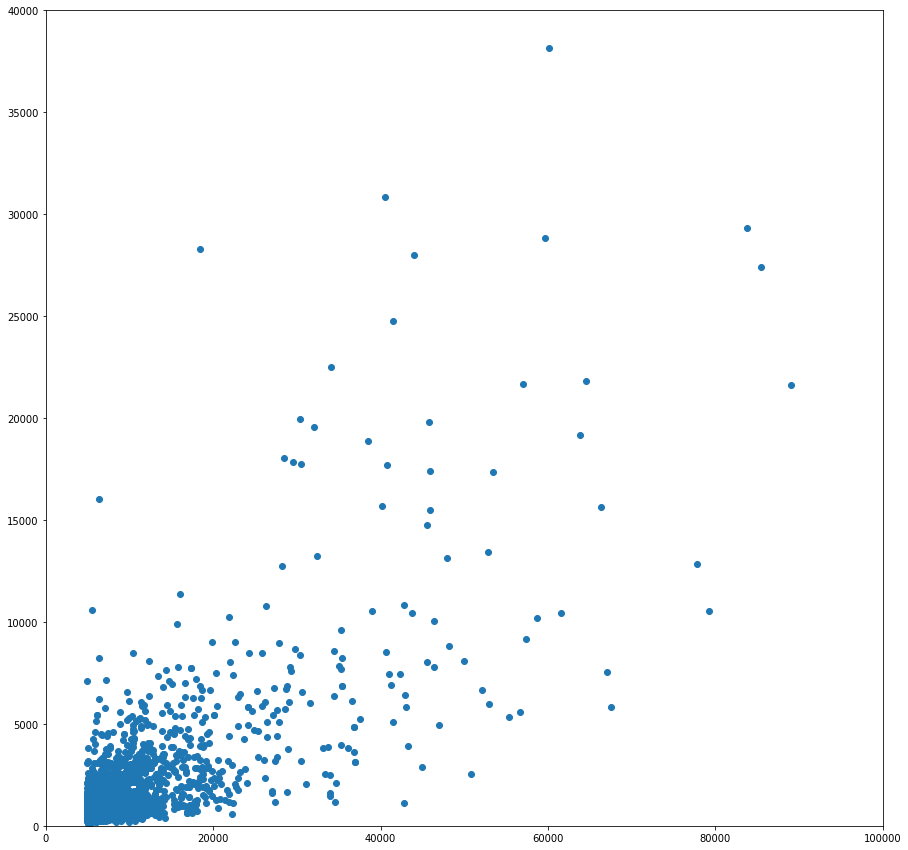

In [68]:
plt.figure(figsize = (15, 15))
plt.scatter(data['Stars'], data['Forks'])
plt.xlim(0, 100000)
plt.ylim(0, 40000)

(0, 200000)

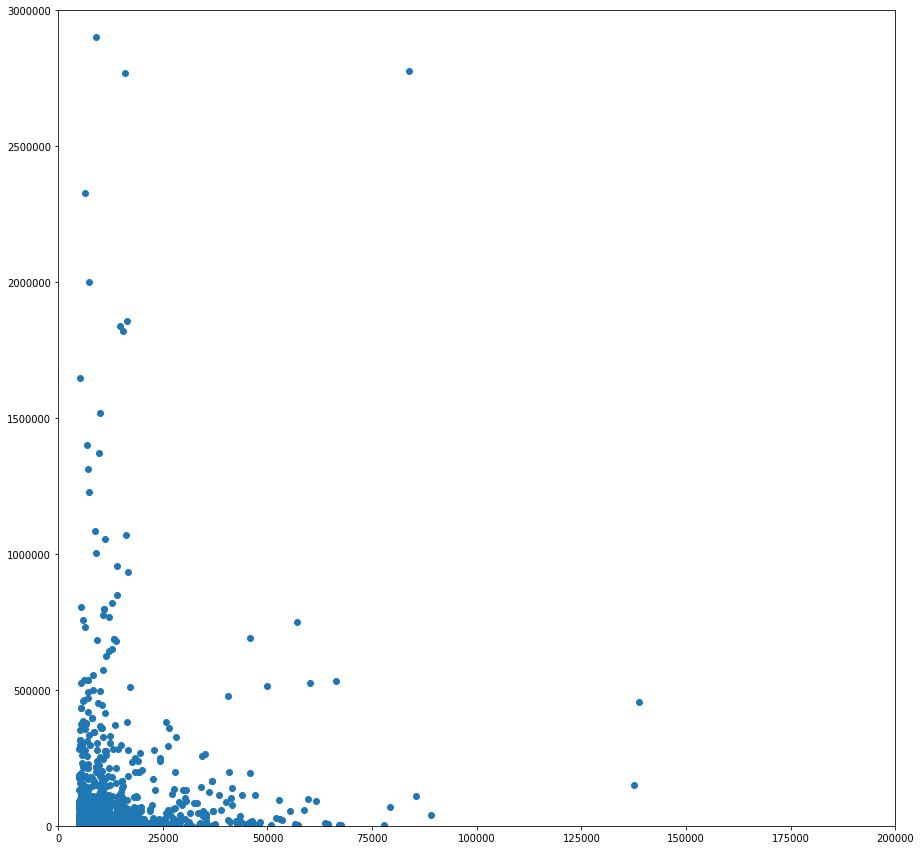

In [72]:
plt.figure(figsize = (15, 15))
plt.scatter(data['Stars'], data['Size'])
plt.ylim(0, 3000000)
plt.xlim(0, 200000)

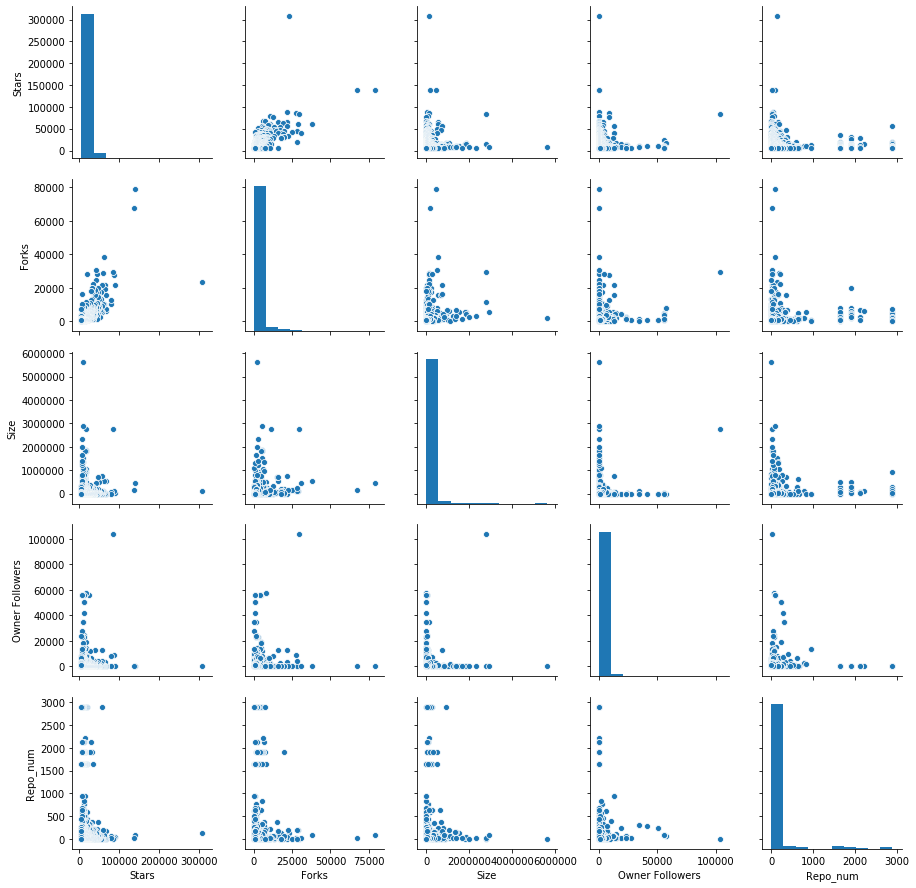

In [39]:
sns.pairplot(data)

In [ ]:
data.groupby('Language').apply